# Robot Localisation using a Particle Filter
***
# Table of Contents
1.  [Setup](#Setup)
2.  [Setting up the Environment](#Setting-up-the-Environment)
3.  [Initializing the Robot](#Initializing-the-Robot)
4.  [Sense Function](#Sense-Function)
5.  [Move Function](#Move-Function)

# Setup

For this assignment I heavily used my work from ex 24 and previous exercises. To better present my work, I removed the
oop aspect of having a robot class and decided to make my robot in the form of a global python dictionary, consequently,
the function classes now access the robot/particles by reference. This allowed me to split my code in several cells
making it easier to explain and mark which part of the assignment where.

For this I will mark each code cell by a quoted text, featuring which exercises where tackled.

Example:

> a(i), a(ii)

```
def sense(rob):
    .
    .
    .
```

Some code cells will have an md cell above it with the sub heading **Code Explanation** and some code cells will have one
beneath them with the sub heading **Comments**. These md cells will have code explanations and comments about the code
and/or results.

I am using python 3.7.

An html file generated by the Jubyter Notebook is attached for more readability.

In [1]:
from math import pi, sqrt, cos, sin, atan2, tan, exp
from random import random, gauss
import matplotlib.pyplot as plt
%matplotlib inline

## Comments

Pi and a number of functions from the standard math and random libraries are required for this assignment.

I will be using matplotlib to draw the environment to better visualize and explain what is going on.

# Setting up the Environment

In this step I initialise the landmark locations and and world size.

## Code Explanation
I also code in a drawEnv function which is able to draw the environment boundaries as blue lines and the landmarks as
red circles.

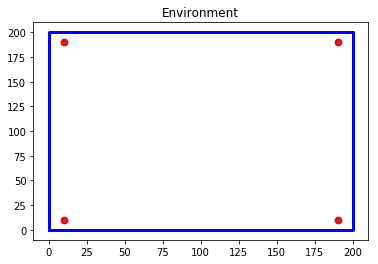

In [2]:
LANDMARKS  = [[10, 10], [190, 190], [10, 190], [190, 10]]
WORLD_SIZE = 200

def drawEnv():
    x_landmark = [10, 190, 10, 190]
    y_landmark = [10, 190, 190, 10]
    # Draw point based on above x, y axis values.
    plt.scatter(x_landmark, y_landmark, s=8, edgecolors="red", linewidths=5)
    x_bounds = [0, 200, 200, 0, 0]
    # List to hold y values.
    y_bounds = [0, 0, 200, 200, 0]
    # Plot the environment bound
    plt.plot(x_bounds, y_bounds, linewidth=3, color='b')
    plt.title("Environment")
drawEnv()
plt.show()

# Initializing the Robot

## Code Explanation

In this step I initialise the robot giving it a random point in the boundary and a random orientation. I also initialise
the robots length, and a number of noise values as instructed by the assignment.

In [3]:
MAX_STEERING_ANGLE = pi / 4 # r
BEARING_NOISE_VAR, STEERING_NOISE_VAR, DISTANCE_NOISE_VAR = (0.1, 0.1, 5)

ROBOT_LENGTH = 10

robot = {
            "front_x": random() * WORLD_SIZE,
            "front_y": random() * WORLD_SIZE,
            "orientation": random() * 2 * pi,
            "steering": 0#-MAX_STEERING_ANGLE + (MAX_STEERING_ANGLE*2)*random()
        }

## Comments

At this stage I decided to initialise the steering angle at 0 so that I can properly test the move function later on.

## Code Explanation

Here I update drawEnv to now include a passed robot when drawing the environment. The robot can be drawn as either a red
or cyan arrow, the direction of the arrow being its orientation.

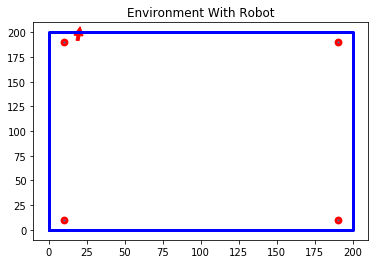

In [4]:
def drawEnvWithBot(rob, red=True):
    drawEnv()
    plt.title("Environment With Robot")
    if red:
        colour = 'r'
    else:
        colour = 'c'
    plt.arrow(rob['front_x'], rob['front_y'], cos(rob['orientation']) * 5, sin(rob['orientation']) * 5, width=2, color=colour)
drawEnvWithBot(robot)
plt.show()

## Comments

The cyan and red colour will help us differentiate between the robot and the particles later on.

# Sense Function

I split this part into two; first the robot senses without having the noise added in, to make sure the function works,
then I add the noise in and check the difference.

> a(i), a(ii)

## Code Explanation

The getAngle function returns the angle between two points.

In [5]:
def getAngle(fromX,fromY,toX,toY):
    deltaX = fromX - toX
    deltaY = fromY - toY
    return atan2(deltaY, deltaX)

## Code Explanation

Sense uses the getAngle function to get the angle between the robot and the four landmarks. This reading ```z``` is
appended to ```Z``` a list.

I also get the euclidean distance between these two points and append the x, y points to ```x2``` and ```y2```, both
lists. This will allow me to plot the sensor readings as lines using matplotlib.

In [6]:
x2 = []
y2 = []

def sense(rob):
    Z = []
    for landmark in LANDMARKS:
        z = getAngle(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        dist = sqrt(((rob['front_x'] - landmark[0])**2) + ((rob['front_y'] - landmark[1])**2))
        x2.append(rob['front_x'] + dist * -cos(z))
        y2.append(rob['front_y'] + dist * -sin(z))
        Z.append(z)

    return Z

## Code Explanation

Here I add the drawing of the sensor readings by plotting orange lines coming out of the robot, and hopefulyl landing on
the landmarks.

In [7]:
def drawEnvWithSensorReadings(rob):
    line_x = []
    for x in x2:
        line_x.append(rob['front_x'])
        line_x.append(x)

    line_y = []
    for y in y2:
        line_y.append(rob['front_y'])
        line_y.append(y)

    plt.plot(line_x, line_y, linewidth=1, color='orange')
    drawEnvWithBot(rob)

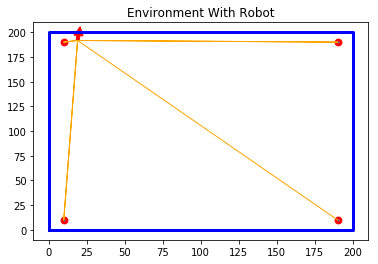

In [8]:
s = sense(robot)
drawEnvWithSensorReadings(robot)
plt.show()

## Comments

Great, the robot was able to perfectly sense where the landmarks are.


## Code Explanation

Now its time to add noise to the angle and distance readings. This is done by adding a random number from gaussian
distribution with signma = BEARING_NOISE_VAR for the bearing readings and sigma = DISTANCE_NOISE_VAR for the distance
readings.

In [9]:
def sense(rob):
    Z = []
    for landmark in LANDMARKS:
        z = getAngle(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        z += gauss(0, BEARING_NOISE_VAR)
        dist = sqrt(((rob['front_x'] - landmark[0])**2) + ((rob['front_y'] - landmark[1])**2))
        x2.append(rob['front_x'] + dist * -cos(z) + gauss(0, DISTANCE_NOISE_VAR))
        y2.append(rob['front_y'] + dist * -sin(z) + gauss(0, DISTANCE_NOISE_VAR))
        Z.append(z)

    return Z

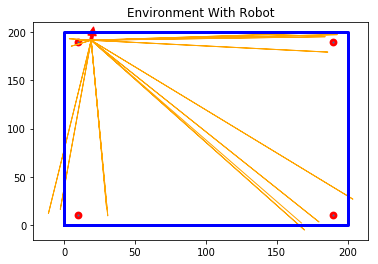

In [10]:
x2 = []
y2 = []

for _ in range(4):
    s = sense(robot)
drawEnvWithSensorReadings(robot)
plt.show()

## Comments

Now that noise is added each sensor reading is different from the other with varying bearing and distance readings. This
confirms that the sense function is working as intended.


# Move Function

For the move function I opted to only present its final version since it is quite longer than the sense function. Also
most of the code explanation will be done via inline comments for the function itself.

> b(i), b(ii), b(iii), b(iv), b(v)

## Code Explanation

With set_pos I am able to make sure that if the robot moves out of bounds I can fix it by flipping its angle and placing
it within bounds.

In [11]:
def set_pos(new_x, new_y, new_orientation, new_steering):
    if new_x < 0 or new_x >= WORLD_SIZE:
        new_x = 0 if new_x < 0 else WORLD_SIZE
        new_orientation = - pi
        new_orientation %= (2 * pi)
    if new_y < 0 or new_y >= WORLD_SIZE:
        new_y = 0 if new_y < 0 else WORLD_SIZE
        new_orientation = - pi
        new_orientation %= (2 * pi)
    if new_orientation < 0 or new_orientation >= 2 * pi:
        raise ValueError('Orientation must be in [0..2pi]')
    if new_steering < -MAX_STEERING_ANGLE or new_steering > MAX_STEERING_ANGLE:
        raise ValueError('Steering must be in [-pi/4..pi/4]')
    return float(new_x), float(new_y), float(new_orientation), float(new_steering)

In [12]:
def move(rob, steer_angle, distance):
    # b(i)
    # Here I make sure that the passed steer_angle and distance are within bounds i.e. inside the maximum steer angle,
    # and a forward direction distance (no reversing)
    if steer_angle < -MAX_STEERING_ANGLE or steer_angle > MAX_STEERING_ANGLE:
        raise ValueError('Robot can only steer in [-pi/4..pi/4]')
    if distance < 0:
        raise ValueError('Robot can only move forward')

    # b(ii)
    # Get a new steer angle by adding noise to the input
    steering = steer_angle + gauss(0, STEERING_NOISE_VAR)
    # make sure it is within bounds
    # using % doesnt work here so I have to check which bound it potentially reached manually
    steering = MAX_STEERING_ANGLE if steering > MAX_STEERING_ANGLE else steering
    steering = -MAX_STEERING_ANGLE if steering < MAX_STEERING_ANGLE else steering
    #steering %= MAX_STEERING_ANGLE

    # Get the new distance by adding noise to the input
    dist = distance + gauss(0.0, DISTANCE_NOISE_VAR)

    # b(iii)
    # Get the turn angle
    turn = (dist/ROBOT_LENGTH) * tan(steering)

    # b(iv)
    # decide whether to approximate straight line motion or use the bicycle model
    if turn > 0.001 or turn < -0.001:
        # b(v)
        # Here I use the bicycle model to get a new location for the robot
        r = tan((pi/2) - steering) * ROBOT_LENGTH

        Cx = rob['front_x'] - (r * sin(rob['orientation']))
        Cy = rob['front_y'] + (r * cos(rob['orientation']))

        x = Cx + (r * sin(rob['orientation'] + turn))
        y = Cy - (r * cos(rob['orientation'] + turn))

        orientation = (rob['orientation'] + turn)
        orientation %=( 2 * pi)

    else:
        # Straight line motion
        x = rob['front_x'] + (cos(rob['orientation']) * dist)
        y = rob['front_y'] + (sin(rob['orientation']) * dist)
        x %= WORLD_SIZE
        y %= WORLD_SIZE
        orientation = (rob['orientation'] + steering)
        orientation %= (2 * pi)

    rob['front_x'], rob['front_y'], rob['orientation'], rob['steering'] = set_pos(x, y, orientation, steering)
    return rob

## Code Explanation

Here I draw the robot before moving, and then again after the move.

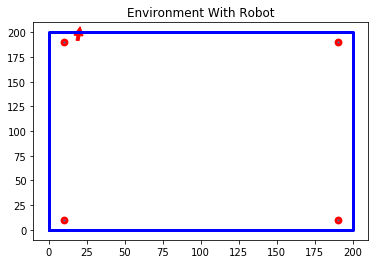

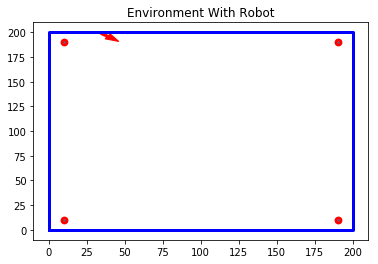

In [13]:
drawEnvWithBot(robot)
plt.show()

robot = move(robot, 0, 10)

drawEnvWithBot(robot)
plt.show()

## Comments

While expected to move in a straight line I found that this will almost never happen due to the large noise assigned to the sensors. This is possible since the noise for the steering is 0.1 while the treshold for straight line movement is 0.001.

It is also important to note that from this stage onward, the robot's location is approximated and not true.

# Particle Filter

For this final segment of the assignment a number of functions where used.

## Code Explanation

These two functions below are used to give us the probability that a measurement taken is correct. This will be used to
weigh the particles.

> c(ii)

In [14]:
def Gaussian(mu, sigma, x):
    # calculates the probability of x for 1-dim Gaussian with mean mu and var. sigma
    return exp(- ((mu - x) ** 2) / (sigma ** 2) / 2.0) / sqrt(2.0 * pi * (sigma ** 2))

def measurement_prob(rob, measurement):
    # calculates how likely a measurement should be
    prob = 1.0
    for j, landmark in enumerate(LANDMARKS):
        z = getAngle(rob['front_x'], rob['front_y'], landmark[0], landmark[1])
        prob *= Gaussian(z, BEARING_NOISE_VAR, measurement[j])
    return prob

## Code Explanation

Using the evaulate function I can get the average error between the robot passed and the particles passed.

In [15]:
def evaluate(rob, particles):
    sum = 0.0
    for p in particles: # calculate mean error
        dx = (p['front_x'] - rob['front_x'] + (WORLD_SIZE/2.0)) % (WORLD_SIZE - (WORLD_SIZE/2.0))
        dy = (p['front_y'] - rob['front_y'] + (WORLD_SIZE/2.0)) % (WORLD_SIZE - (WORLD_SIZE/2.0))
        err = sqrt((dx * dx) + (dy * dy))
        sum += err
    return sum / float(len(particles))

## Comments

Now that I have all my tools ready I can initialise the particles in the environment as well as a new robot with random
steering.

## Code Explanation
Apart from re-initialising the robot and setting up for the particle filter I also draw the robot in the environment as
well as the particles. From now on the robot will be a red arrow and the particles cyan arrows.

> c(i)

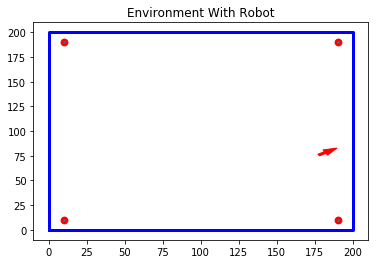

Mean error at start  76.2646672307079
41.020348582280384 53.627080887122894 4.382527074143928 -0.41945180747242483
166.57215611661456 164.72814112363116 1.5743465793977727 0.14547756907496423
12.80651668270556 157.42456893329228 0.3710058379667018 0.31411279542087467
147.91912823209606 193.17476464076756 0.74156075548781 0.040408144565529214
191.42813565248025 113.69919095234718 2.7490011134518504 0.3240967605795375
136.5544587296999 39.704434165480066 3.407518531225198 -0.0013019424091732512


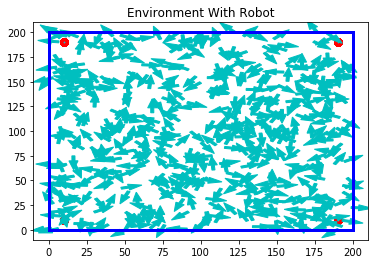

In [16]:
N = 500
epochs = 5

robot = {
            "front_x": random() * WORLD_SIZE,
            "front_y": random() * WORLD_SIZE,
            "orientation": random() * 2 * pi,
            "steering": -MAX_STEERING_ANGLE + (MAX_STEERING_ANGLE*2)*random()
        }

drawEnvWithBot(robot)
plt.show()

p = []
for i in range(N):
    r = {
            "front_x": random() * WORLD_SIZE,
            "front_y": random() * WORLD_SIZE,
            "orientation": random() * 2 * pi,
            "steering": -MAX_STEERING_ANGLE + (MAX_STEERING_ANGLE*2)*random()
        }
    p.append(r)

print( 'Mean error at start ', evaluate(robot, p))
for i, _p in enumerate(p):
    print(_p['front_x'], _p['front_y'], _p['orientation'], _p['steering'])
    if i == 5:
        break
for _p in p:
    drawEnvWithBot(_p, False)
plt.show()

## Comments

The particle plot clearly shows that they where evenly distributed throughout the environment.

## Code Explanation

This is done via in line comments.
> c(iii)

In [17]:
for _ in range(epochs):
    # Move and sense bot
    robot = move(robot, 0.1, 5.0)
    Z = sense(robot)
    # move the particles
    p2 = []
    for _p in p:
        p2.append(move(_p, 0.1, 5.0))
    p = p2
    # Get the measurement probabilities
    w = []
    for _p in p:
        w.append(measurement_prob(_p, Z))
    p3 = []
    # Resampling is done according to importance weights
    index = int(random() * N)
    beta = 0.0
    mw = max(w)
    for i in range(N):
        beta += random() * 2.0 * mw
        while beta > w[index]:
            beta -= w[index]
            index = (index + 1) % N
        p3.append(p[index])
    p = p3

    print('Mean error',evaluate(robot, p))

Mean error 52.84942417895133
Mean error 23.76618740881233
Mean error 97.2200993725056
Mean error 135.7887990164858
Mean error 59.15034366503722


## Code Explanation

Draw the particles and the robot

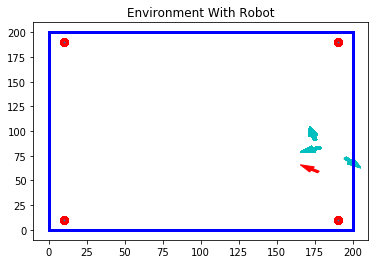

In [18]:
for _p in p:
    drawEnvWithBot(_p, False)

drawEnvWithBot(robot)
plt.show()

## Comments

Looking at the mean error outputs and the plots I can clearly see the improvement at approximating the robot via the
particle filter. While not 100% accurate this is expected due to the number of noise factors added in.

>c(iv)

To get better results I changed the ```epoch``` variable because with each run I was including more and more noisy
readings. It is not ideal to reduce this variable for experimentation for real life use of localisation because in a
real life situation the epoch number would be very large.
